In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import warnings


warnings.filterwarnings("ignore")      #忽略掉烦人的warning

%matplotlib inline

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

def cv_show(name,img):       #定义显示图片的函数（可能会卡死）
    cv2.imshow(name,img)
    cv2.waitKey(0)           #等待时间 毫秒级 0表示任意键终止
    cv2.destroyAllWindows()
    
def inversePic(img):         #显示正常色彩的颜色（img read的色彩是BGR格式，而plt输出的是RGB色彩，需要格式转换）
    b,g,r = cv2.split(img)   #分割色彩空间
    img = cv2.merge([r,g,b]) #merge RGB
    return img
    
def show(img):               #定义显示图片的函数（在命令行下方输出图片）
    if(len(img.shape) == 3):     #彩色图像
        img = inversePic(img)
        plt.imshow(img)          #多采用plt方式输出图片 一般的cv_imshow会出现卡死的状况
    else:                        #灰度图像
        plt.imshow(img,cmap = "gray")
    
def showList(imgs,titles):                  #显示多张照片
    plt.figure(figsize=(16,16))      #设置每张图片的大小
    y = math.ceil(len(imgs)**0.5)    #设置列数
    x = len(imgs) / y + 1            #设置行数
    for i in range(len(imgs)):               #对img数组中的元素进行遍历
        plt.subplot(x,y,(i+1))       #设置位置 x行y列顺序第i+1个
        if(len(imgs[i].shape) == 3):     #如果是三通道数的图->需要特殊处理
            res = inversePic(imgs[i])    #将图像处理成RGB格式
            plt.imshow(res)
        else:                           #如果是单通道数的图->不需要特殊处理 直接输出
            plt.imshow(imgs[i],cmap = "gray")
        if(len(titles) == len(imgs)):
                plt.title(titles[i])
    plt.show()

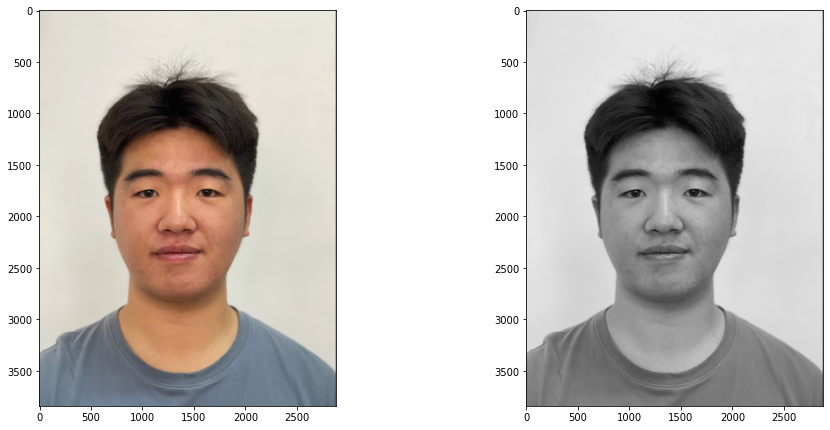

In [51]:
img = cv2.imread('lxc.JPG')  #读取图片
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #转成灰度图
imgs = [img,img_grey]
#plt.imshow(img_grey,cmap = "gray")                 #由于plt输出的是RGB格式，输出灰度图会偏绿，要加一个cmap = "gray"
showList(imgs,[""])

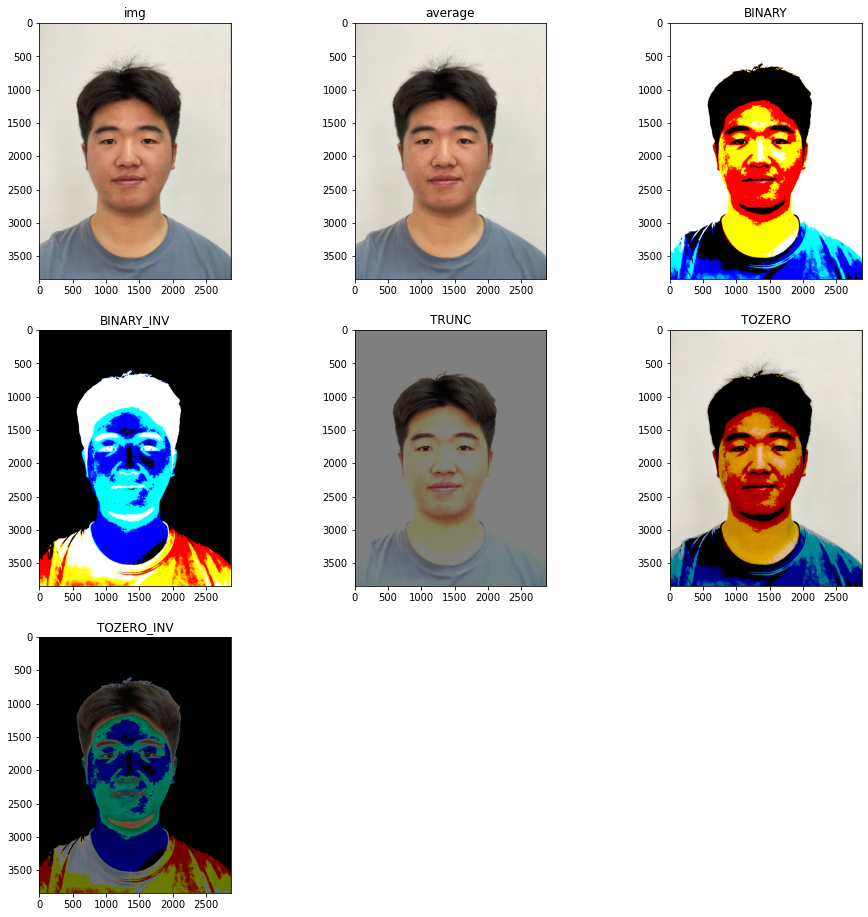

In [52]:
#针对RGB彩色图
img_blur = cv2.blur(img,(10,10))        #在3*3的空间内卷积取平均值
ret,img_binary     =  cv2.threshold(img,127,255,cv2.THRESH_BINARY)       #超过阈值的部分去maxval最大值 否则取0
ret,img_binary_inv =  cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)   #THRESH_BINARY的反转
ret,img_trunc      =  cv2.threshold(img,127,255,cv2.THRESH_TRUNC)        #大于阈值部分设为阈值，否则不变
ret,img_tozero     =  cv2.threshold(img,127,255,cv2.THRESH_TOZERO)       #大于阈值部分不改变，否则取0
ret,img_tozero_inv =  cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)   #THRESH_TOZERO的反转
imgs   = [img,img_blur,img_binary,img_binary_inv,img_trunc,img_tozero,img_tozero_inv]
titles = ['img','average','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
showList(imgs,titles)

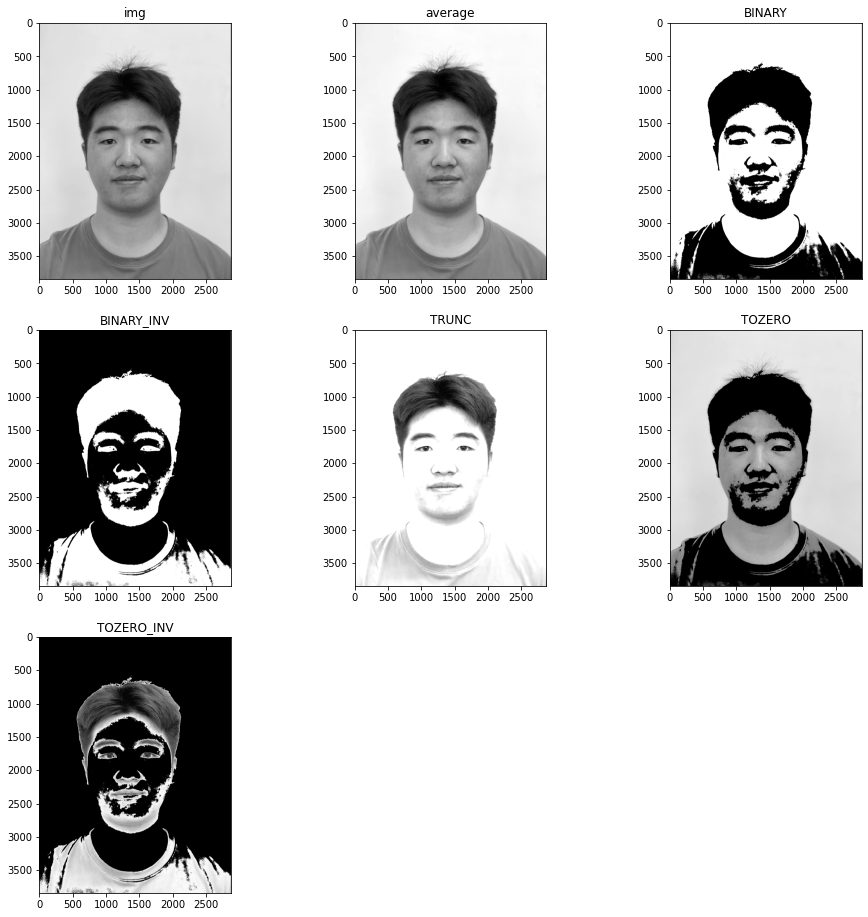

In [53]:
#针对灰度图
img_blur = cv2.blur(img_grey,(10,10))        #在3*3的空间内卷积取平均值
ret,img_binary     =  cv2.threshold(img_grey,127,255,cv2.THRESH_BINARY)       #超过阈值的部分取maxval最大值 否则取0
ret,img_binary_inv =  cv2.threshold(img_grey,127,255,cv2.THRESH_BINARY_INV)   #THRESH_BINARY的反转
ret,img_trunc      =  cv2.threshold(img_grey,127,255,cv2.THRESH_TRUNC)        #大于阈值部分设为阈值，否则不变
ret,img_tozero     =  cv2.threshold(img_grey,127,255,cv2.THRESH_TOZERO)       #大于阈值部分不改变，否则取0
ret,img_tozero_inv =  cv2.threshold(img_grey,127,255,cv2.THRESH_TOZERO_INV)   #THRESH_TOZERO的反转
imgs   = [img_grey,img_blur,img_binary,img_binary_inv,img_trunc,img_tozero,img_tozero_inv]
titles = ['img','average','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
showList(imgs,titles)

# 边界填充
## 边界填充

matplotlib 中进行边界填充

```python
cv2.copyMakeBorder( img, top_size , bottom_size , left_size , right_size , borderType)
```


其中borderType (格式为 BORDER_xxx)：xxx为

- ORIGINAL
- REPLICATE 复制法
- REFLECT 反射法：对感兴趣的图像中的像素在两边进行复制      fedcba｜abcdefgh｜hgfedcb
- REFLECT_101 反射法：以最边缘像素为轴       gfedcb | abcdefgh | gfedcba
- WRAP 外包装法    cdefgh｜abcdefgh｜abcdefg
- CONSTANT 常量法：常数值填充  并要设定value值（0 为 黑框）

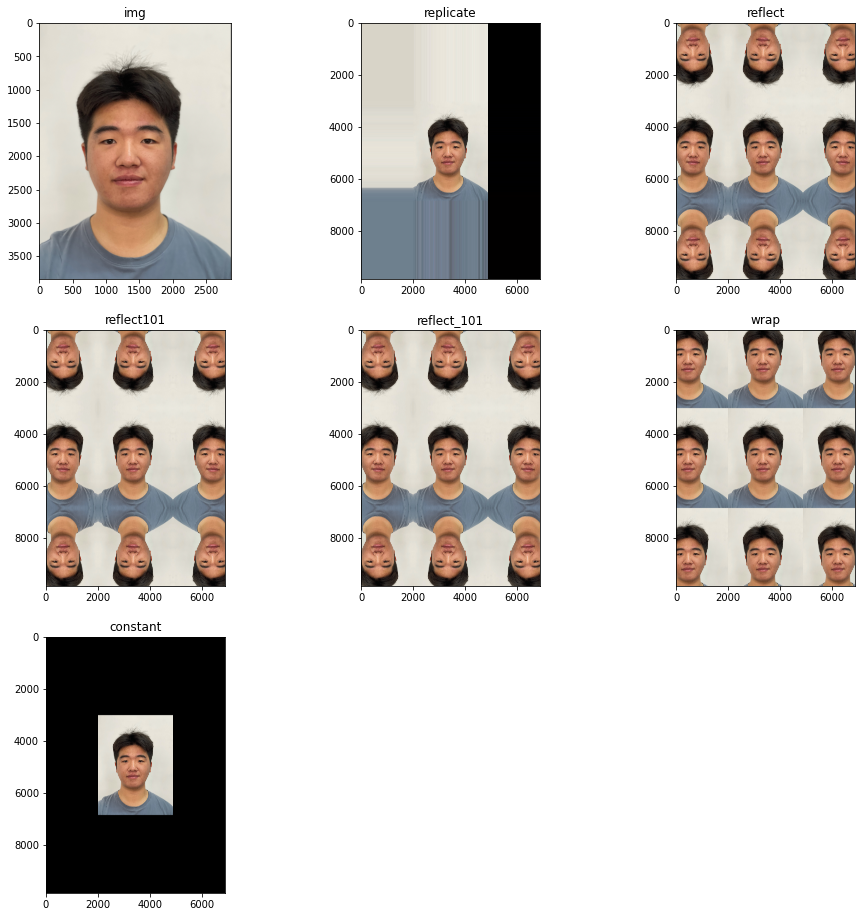

In [91]:
#边界填充
img = cv2.imread('lxc.JPG')
top_size,bottom_size,left_size,right_size = (3000,3000,2000,2000)
replicate = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType = cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType = cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType = cv2.BORDER_REFLECT101)
reflect_101 = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType = cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType = cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType = cv2.BORDER_CONSTANT)
imgs = [img,replicate,reflect,reflect101,reflect_101,wrap,constant]
titles = ['img','replicate','reflect','reflect101','reflect_101','wrap','constant']
showList(imgs,titles)

# 图像融合 数值计算

图像+数值： 矩阵内的所有数值+该数值<br>
图像+图像：所有图像内的数值相加，越界对256进位<br>
add(图像，图像)：相加，最大值255<br>
<b> 两个图像的shape值必须相同 </b>
```
cv2.addWeighted(img1 , weight1 , img2 , weight2 , weight3);	# weight1 2表示权重 3表示提亮多少
```

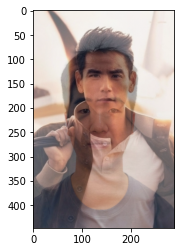

In [84]:
#图像融合 数值计算
img = cv2.imread('lxc.JPG')
img_pyy = cv2.imread('pyy.jpeg')                   #读取pyy照片
x,y = img_pyy.shape[0:2]                           #取出宽和高
img = cv2.resize(img,(y,x))                        #将img图片resize
img_add = cv2.addWeighted(img,0.4,img_pyy,0.6,0)   #将两个图片融合
show(img_add)